In [161]:
import networkx as nx
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt

In [162]:
d = read_csv('data/road_2021.csv')

In [163]:
Data = np.array(d.values)[:,1:]
weights = np.zeros(len(Data[:,1]),dtype=str)
weights[0:] = 'weights'

In [177]:
Data

array([['Achillea.millefolium', 'Achillea.millefolium', 0.0],
       ['Agoseris.aurantiaca', 'Achillea.millefolium', 0.3333333],
       ['Androsace.septentrionalis', 'Achillea.millefolium',
        1.110223e-16],
       ...,
       ['Taraxacum.officinales', 'Veratrum.tenuipetalum', 0.0],
       ['Valeriana.occidentalis', 'Veratrum.tenuipetalum', 0.0],
       ['Veratrum.tenuipetalum', 'Veratrum.tenuipetalum', 0.0]],
      dtype=object)

In [173]:
all_possible = dict(enumerate(list(set(list(Data[:,0])))))
total_species = len(all_possible)

adj_mat = np.zeros((total_species,total_species))

keys = list(all_possible.keys())
vals = list(all_possible.values())

for i in range(len(Data[:,0])):
    species1 = Data[i,0]
    s1idx = vals.index(species1)
    species2 = Data[i,1]
    s2idx = vals.index(species2)
    adj_mat[s1idx,s2idx] = Data[i,2]

adj_mat[np.isnan(adj_mat)] = 0
adj_mat[np.where(adj_mat < 1e-14)]=0

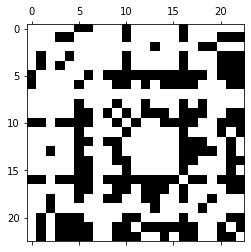

In [172]:
plt.spy(adj_mat)

In [179]:
G = nx.from_numpy_array(adj_mat)

In [185]:
communities = nx.community.louvain_communities(G)
nx.community.modularity(G, communities)

0.44015969937473476

In [ ]:
np.savetxt("adj_mat.csv", adj_mat, delimiter=",")